<style>
table {
  font-family: arial, sans-serif;
  border-collapse: collapse;
  width: 100%;
}
 
td, th {
  border: 1px solid #dddddd;
  text-align: left;
  padding: 8px;
}
 
tr:nth-child(even) {
  background-color: #dddddd;
}
</style>
 
<h2>Group No: 6 DRY BEAN DATASET</h2>
 
<table>
<tr>
<th>Full Name</th>
<th>BITS ID</th>
</tr>
<tr>
<td>SARTHAK BHARGAVA</td>
<td>2022DC04226</td>
</tr>
<tr>
<td>ABHISHEK A BEVINAGIDAD</td>
<td>2022DC04004</td>
</tr>
<tr>
<td>ARNAB BASAK</td>
<td>2022DC04463</td>
</tr>
<tr>
<td>SHINDE NIDHI BHANUDAS</td>
<td>2022DC04429</td>
</tr>
</table>

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
#Import all the required libraries
from sklearn import preprocessing, svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import sklearn.metrics as metrics
import numpy as np
from bioinfokit.visuz import cluster
from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.stats import randint, loguniform
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay

In [155]:
pip install bioinfokit

In [156]:
import sys
!{sys.executable} -m pip install xgboost

# Data Visualization and Exploration 

## 1. Loading the data into dataframe and displaying the first two rows

In [157]:
data = pd.read_excel('Dry_Bean_Dataset.xlsx')

pd.options.display.max_columns = None
pd.options.display.max_rows = None
plt.rcParams["font.family"] = "Times New Roman"
X = data.drop("Class", axis=1)
Y = data['Class']
# Printing first 2 rows of Dataset
data.head(2)

,Bean ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,1,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,2,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER


In [158]:
#Describing the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Bean ID          13611 non-null  int64  
 1   Area             13611 non-null  int64  
 2   Perimeter        13611 non-null  float64
 3   MajorAxisLength  13609 non-null  float64
 4   MinorAxisLength  13608 non-null  float64
 5   AspectRation     13610 non-null  float64
 6   Eccentricity     13609 non-null  float64
 7   ConvexArea       13611 non-null  int64  
 8   EquivDiameter    13611 non-null  float64
 9   Extent           13611 non-null  float64
 10  Solidity         13608 non-null  float64
 11  roundness        13611 non-null  float64
 12  Compactness      13607 non-null  float64
 13  ShapeFactor1     13607 non-null  float64
 14  ShapeFactor2     13609 non-null  float64
 15  ShapeFactor3     13611 non-null  float64
 16  ShapeFactor4     13611 non-null  float64
 17  Class       

## 2. Comment on class imbalance with appropriate visualization method

In [159]:
class_counts = data['Class'].value_counts()
class_counts

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

- Class imbalance can pose challenges in machine learning models, particularly for algorithms that assume balanced class distributions. It can lead to biased models where the majority class dominates the prediction, while minority classes may be overlooked. 

- In Dataset, some classes like "DERMASON" and "SIRA" have a much larger number of instances compared to others like "BOMBAY" and "BARBUNYA", This can be seen in the below visual

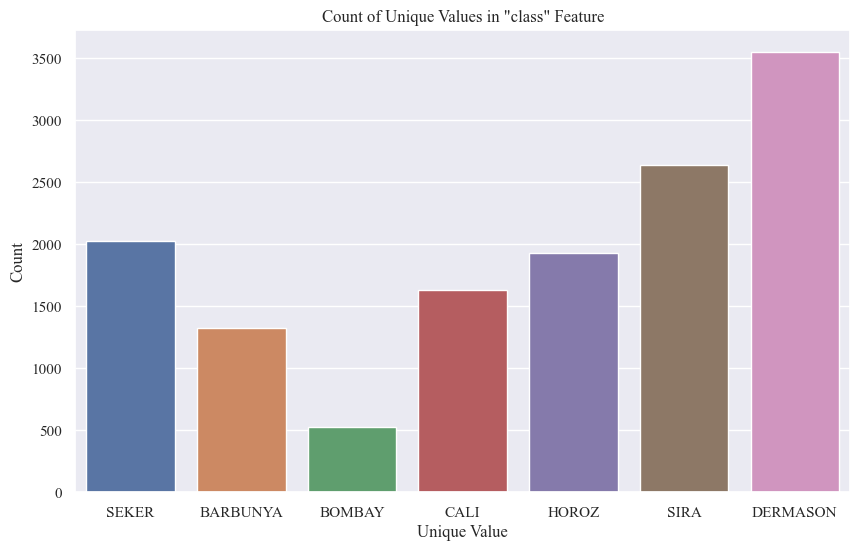

In [160]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Class', data=data)
plt.xlabel('Unique Value')
plt.ylabel('Count')
plt.title('Count of Unique Values in "class" Feature')
plt.show()

## 3. Provide appropriate visualizations to get an insight about the dataset.
- Histograms or Density Plots: To visualize the distribution of numeric variables such as 'Area', 'Perimeter', 'MajorAxisLength', etc. This helps in understanding the spread and central tendencies of the data.

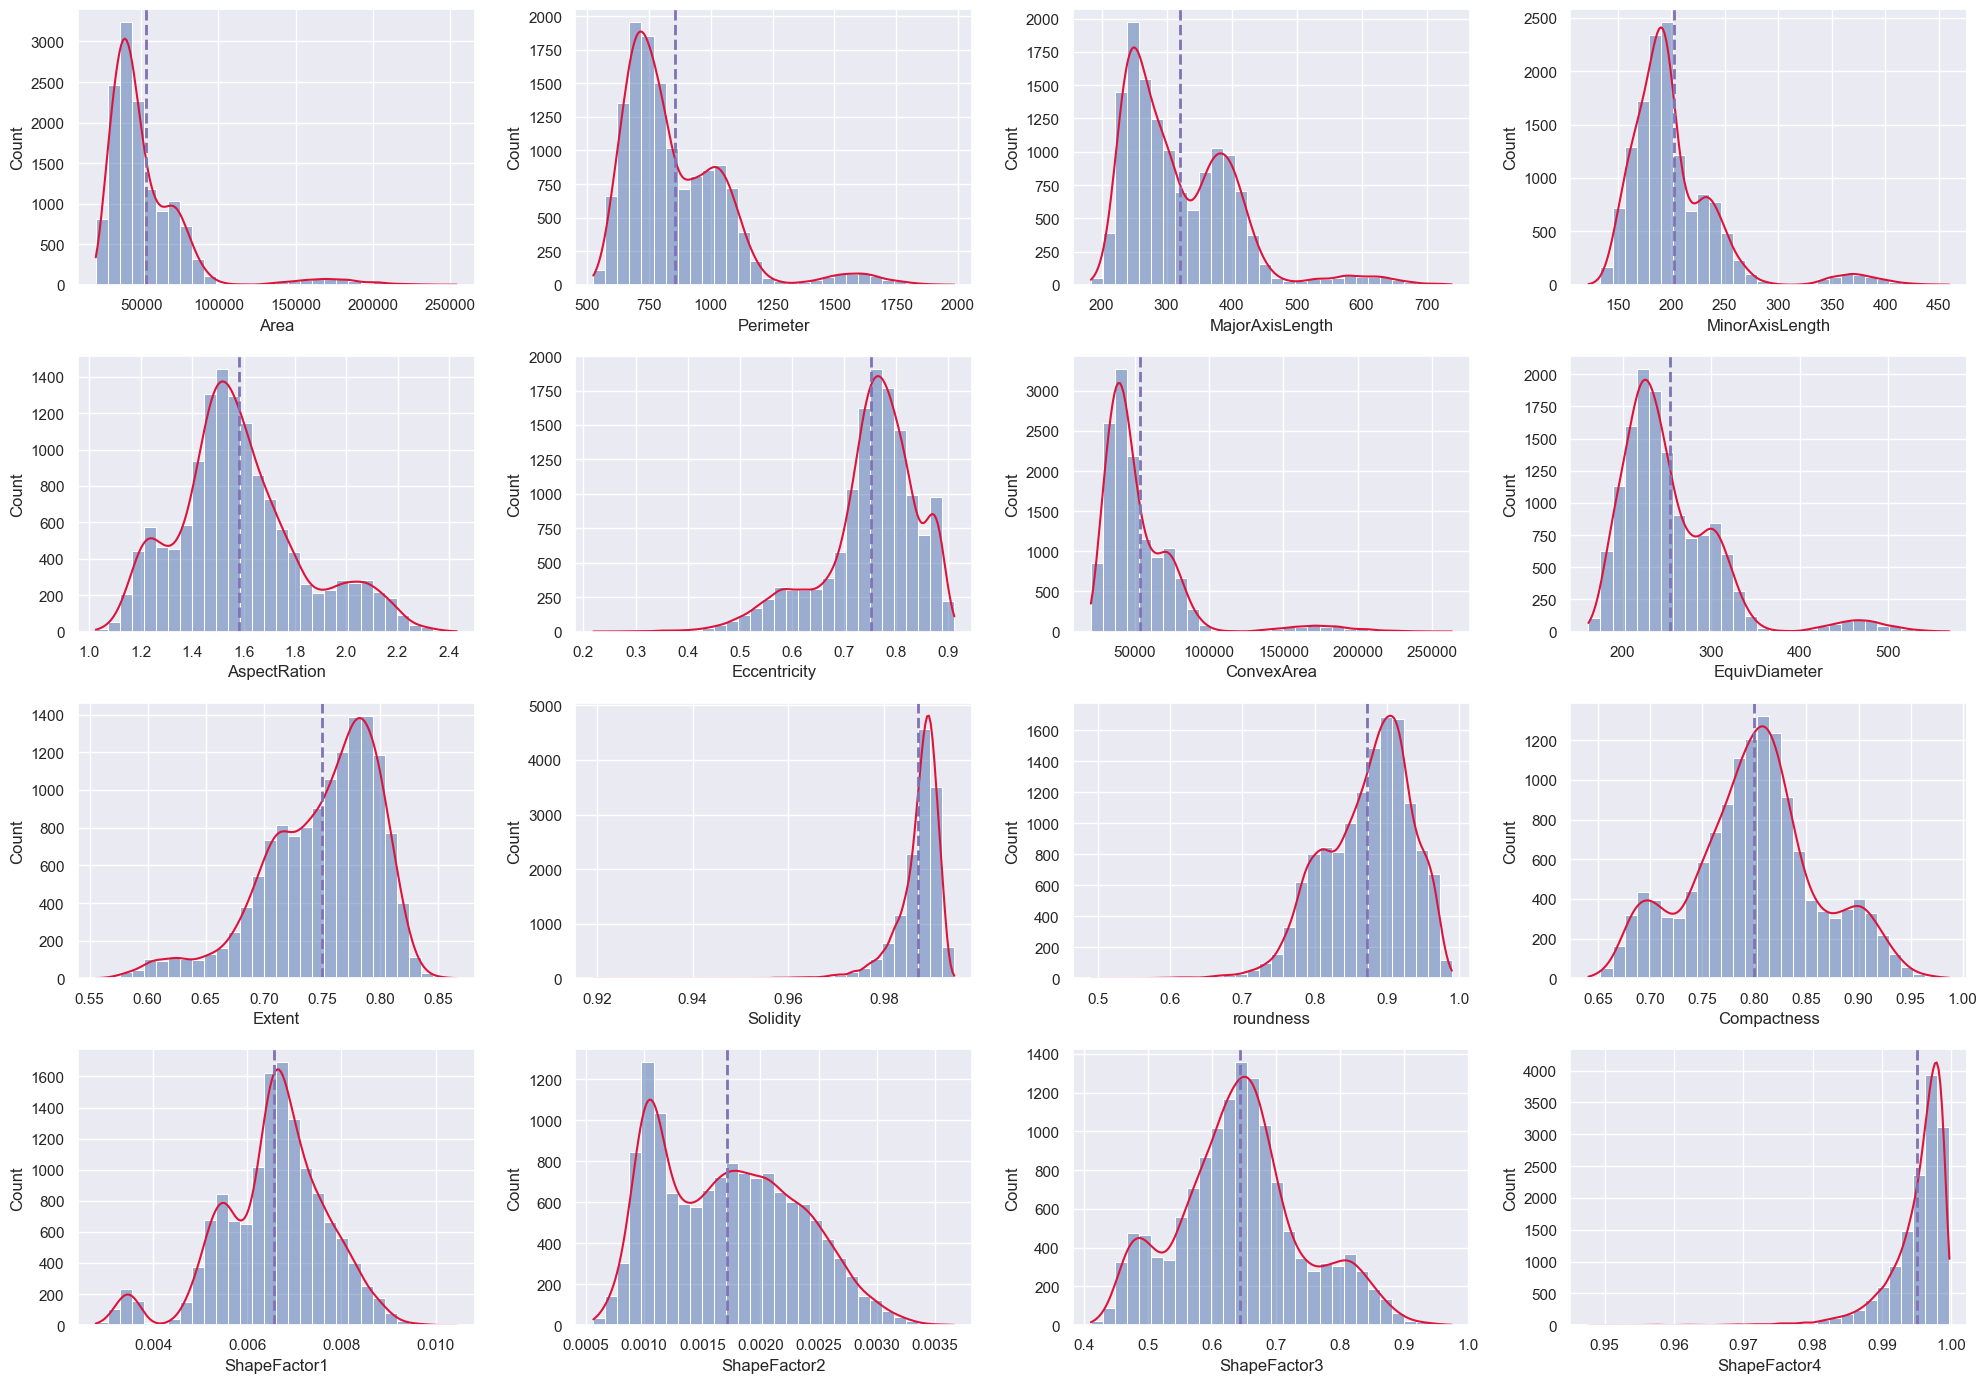

In [161]:
#Visualizing count distribution of each feature
Numeric_cols = data.drop(columns=['Class','Bean ID']).columns

sns.set(style='darkgrid')
fig, ax = plt.subplots(4, 4, figsize=(20, 14))
for variable, subplot in zip(Numeric_cols, ax.flatten()):
    g=sns.histplot(data[variable],bins=30, kde=True, ax=subplot)
    g.lines[0].set_color('crimson')
    g.axvline(x=data[variable].mean(), color='m', label='Mean', linestyle='--', linewidth=2)
plt.tight_layout()

## 4. Do the correlational analysis on the dataset. Provide a visualization for the same. 

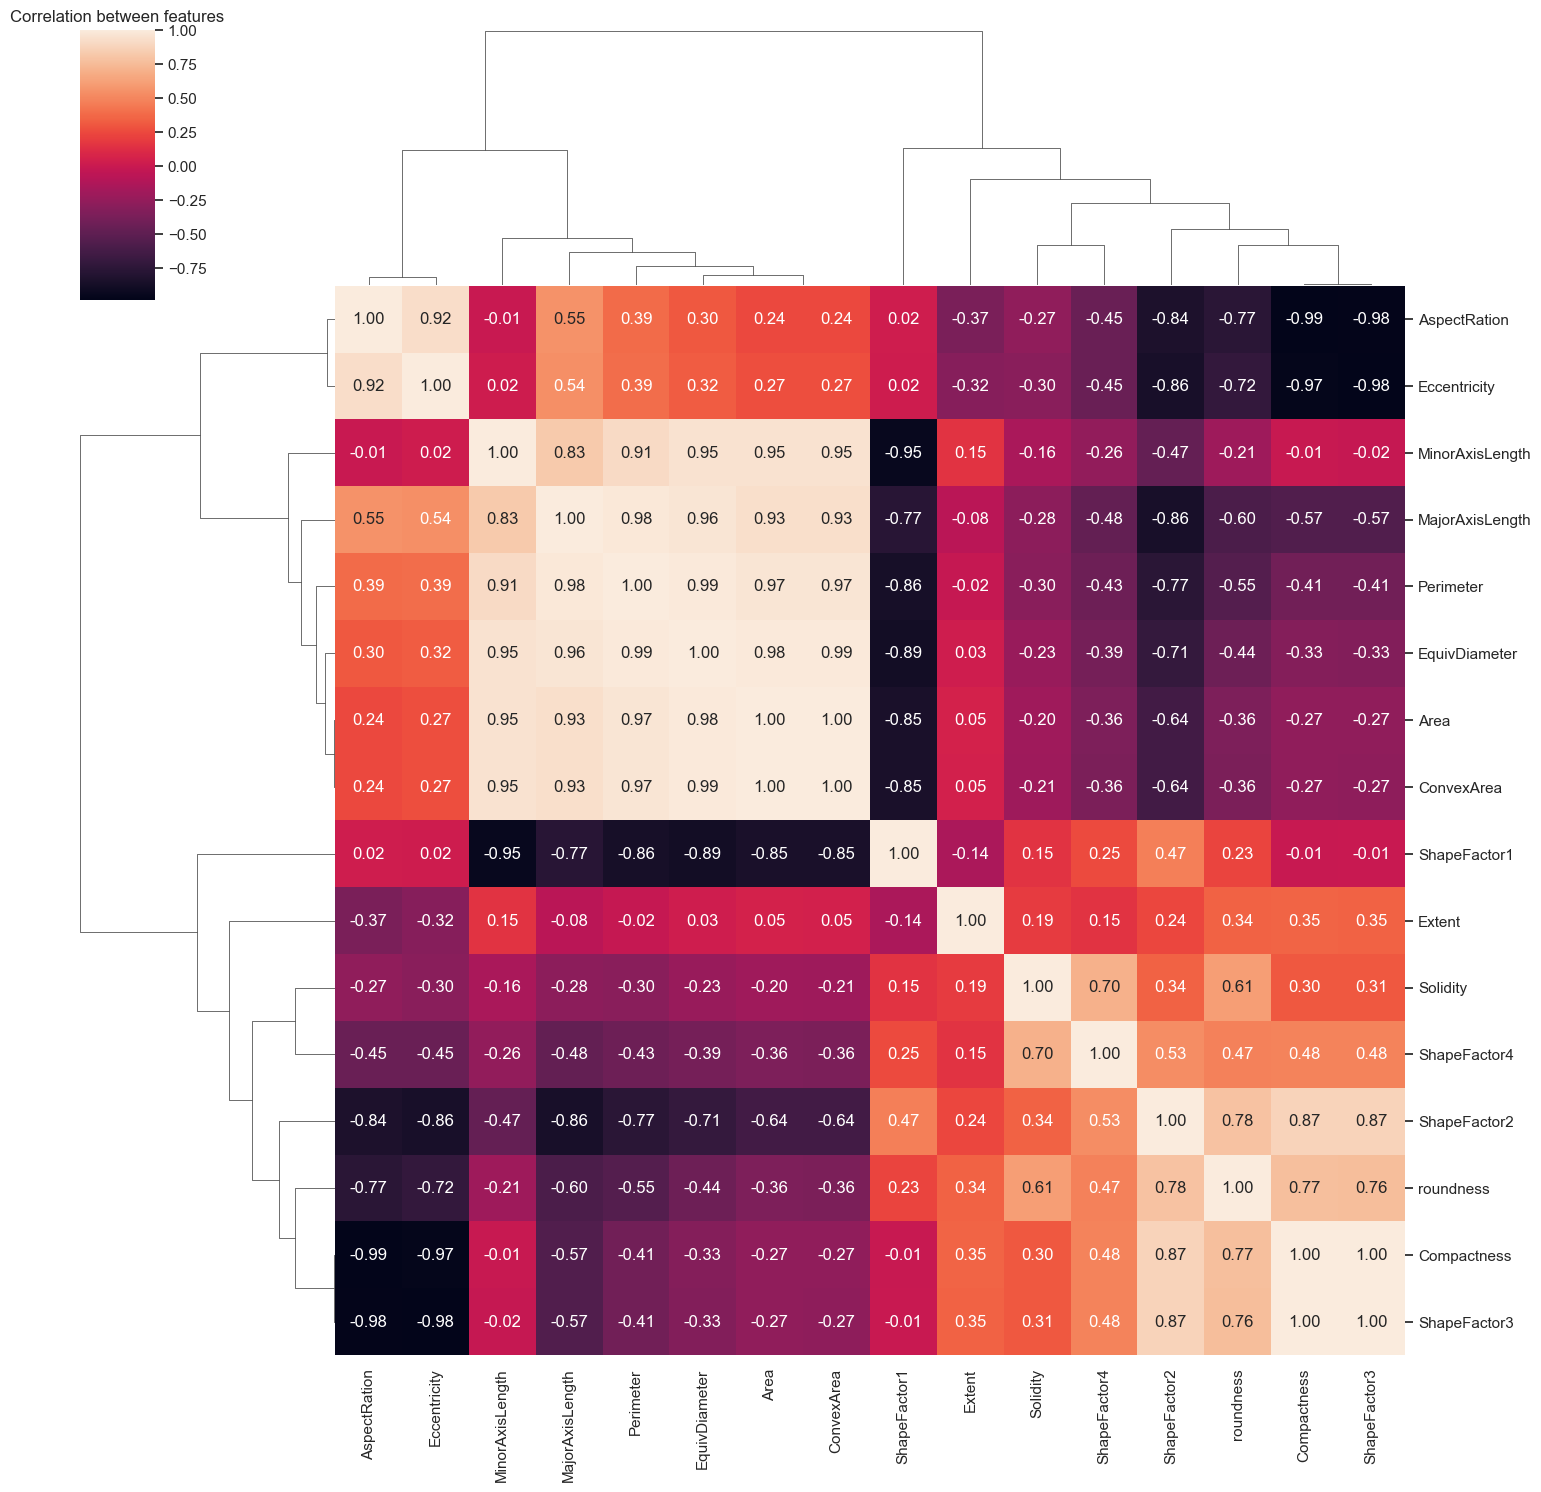

In [162]:
# Visualizing the correlation between the features
correlation_df = data.drop(columns=['Class','Bean ID'])
corr_matrix = correlation_df.corr()
sns.clustermap(corr_matrix, annot=True, fmt=".2f", figsize=(15, 15))
plt.title("Correlation between features");plt.show()

- Correlational analysis helps in understanding the relationship between different features in the dataset. It provides insights into how strongly one feature is correlated with another.
- In feature selection, highly correlated features (with correlation close to 1 or -1) might be redundant as they provide similar information to the model. In such cases, keeping only one of the correlated features might be sufficient to represent the information.

##  5. Any other visualization specific to the problem statement.

- Boxplots: Useful for visualizing the distribution of numeric variables across different categories, such as 'Class'. It helps in identifying outliers and understanding the spread of data within each category.

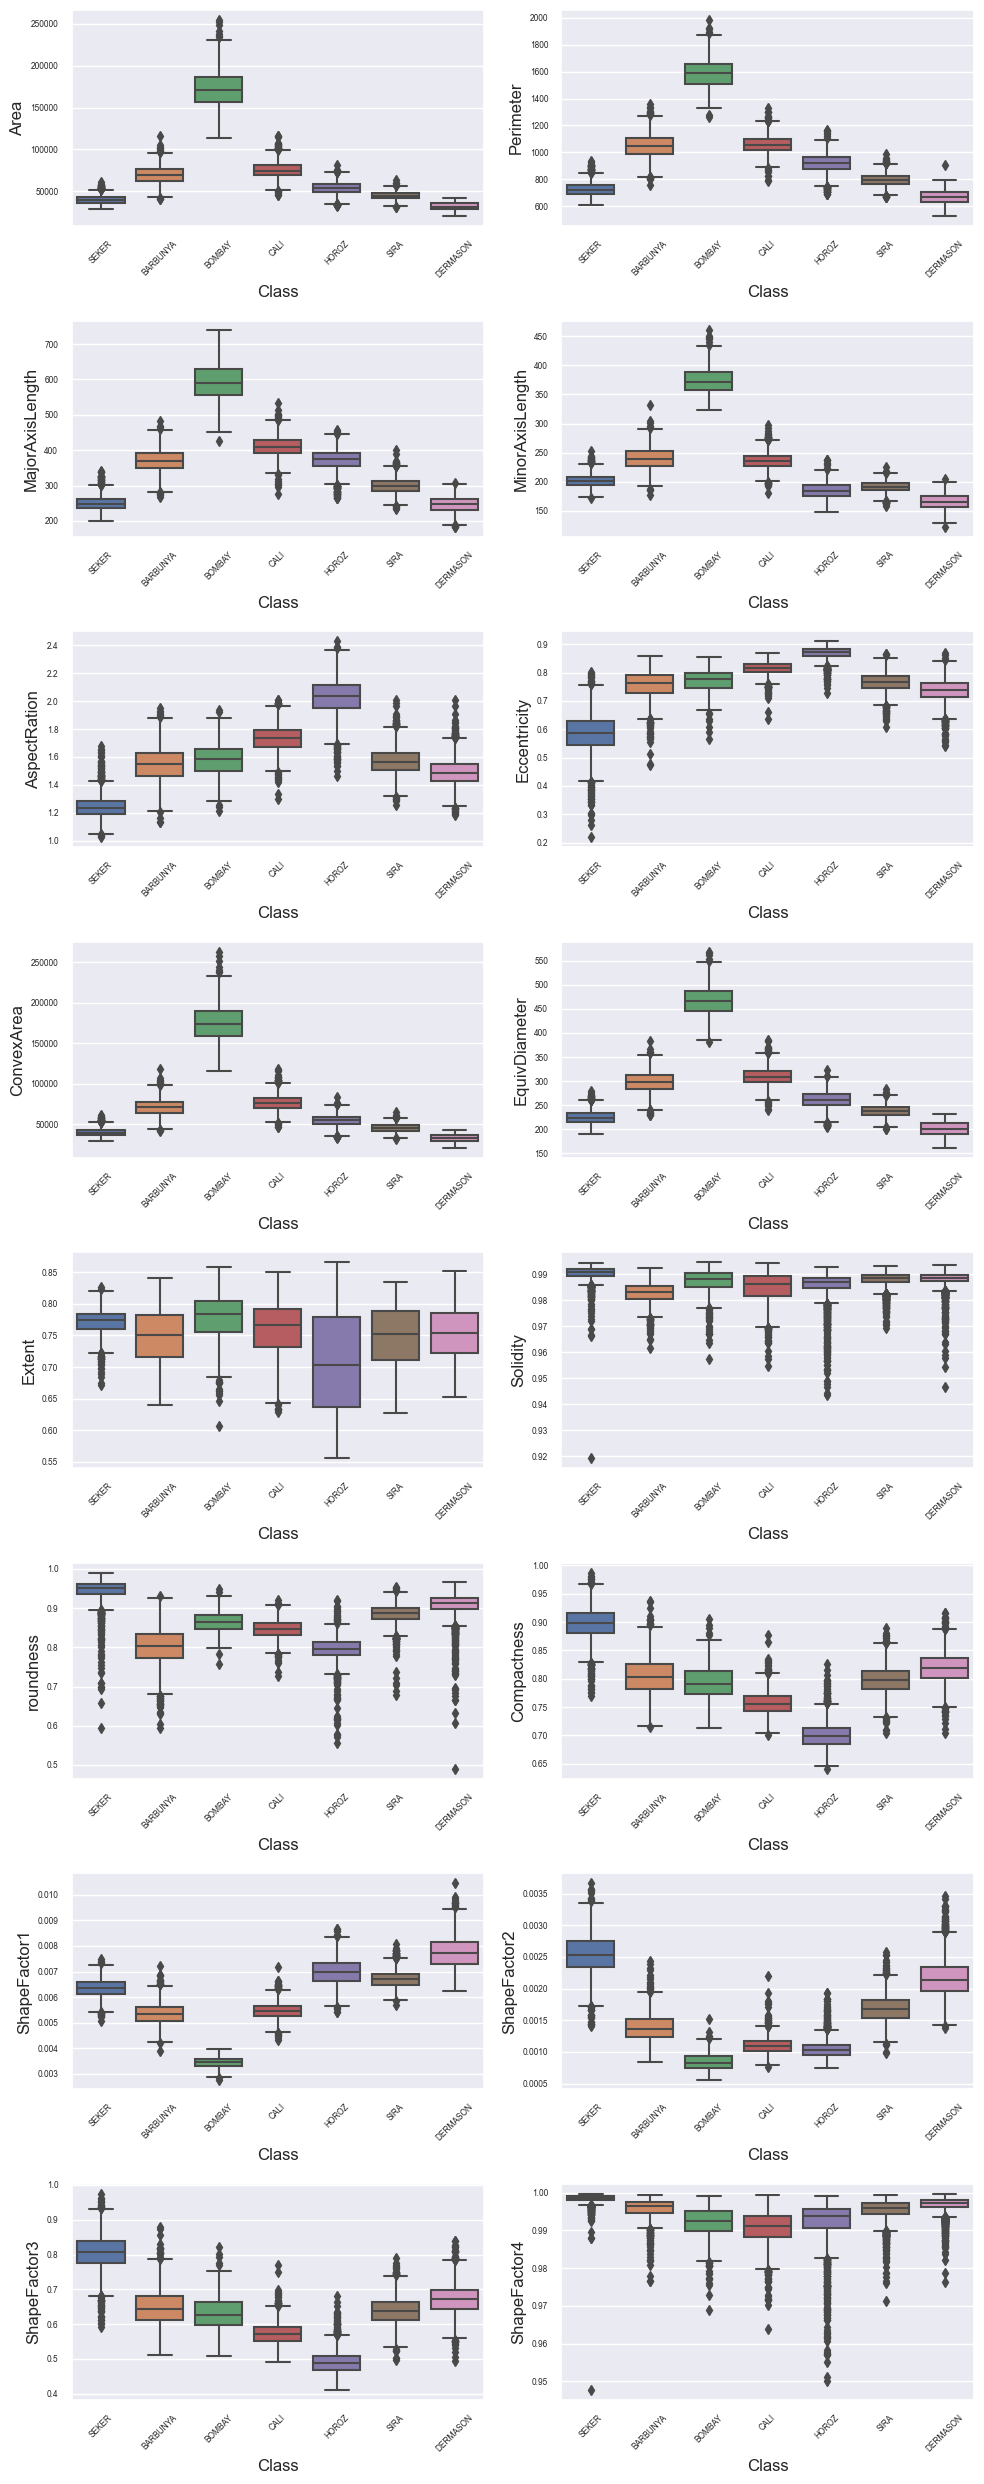

In [163]:
fig, ax = plt.subplots(8, 2, figsize=(10, 25))

for variable, subplot in zip(Numeric_cols, ax.flatten()):
    sns.boxplot(x=data['Class'], y=data[variable], ax=subplot)
    
    # Adjusting tick parameters
    subplot.tick_params(axis='x', labelsize=6, rotation=45)  # Adjust label size and rotation for x-axis
    subplot.tick_params(axis='y', labelsize=6)  # Adjust label size for y-axis

plt.tight_layout()
plt.show()

# Data Pre-Processing

## 1. Outlier Treatment, Label Encoding, Normalize the Input dataset, Null Value handling

### Outlier Detection and Treatment
- Calculating the Interquartile range IQR and identifying the outliers and removing them and making sure we sure we still have enough data

In [164]:
# Detect  outliers in the dataset
def detect_outliers(df, features):
    outlier_indices = []

    for c in features:
        Q1 = np.percentile(df[c], 25)
        Q3 = np.percentile(df[c], 75)
        IQR = Q3 - Q1
        outlier_step = IQR * 1.5
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)

    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 1)

    return multiple_outliers


data = data.drop(detect_outliers(data,['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity',
                                       'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1',
                                       'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4']), axis=0).reset_index(drop=True)
print('Number of of samples in the dataset after removing outliers: %d' % len(data))

Number of of samples in the dataset after removing outliers: 13024


### Finding Null values and treating them
- Null values are unwanted and make PCA and Correlation diffficult, hence they need to be treated
- We are substituting NULL values with the mean of the feature Column

In [166]:
#Finding null values
X.isna().sum()

Bean ID            0
Area               0
Perimeter          0
MajorAxisLength    2
MinorAxisLength    3
AspectRation       1
Eccentricity       2
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           3
roundness          0
Compactness        4
ShapeFactor1       4
ShapeFactor2       2
ShapeFactor3       0
ShapeFactor4       0
dtype: int64

In [167]:
# Columns with null values
columns_with_null = ['MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity',
                     'Solidity', 'Compactness', 'ShapeFactor1', 'ShapeFactor2']

# Replace null values with the mean of each column
for col in columns_with_null:
    X[col].fillna(X[col].mean(), inplace=True)

# Verify that the null values have been replaced
print(X.isnull().sum())

Bean ID            0
Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
dtype: int64


## 2. Feature Engineering

### Label Encoding
- Since target feature 'Class' is a categorical variable with 7 categories of bean types, encode them to numerical values ranging from 0 to 6

In [168]:
# Convert Class String labels into Integers
lab_enc = preprocessing.LabelEncoder()
label_Y = lab_enc.fit_transform(Y)

In [184]:
le_name_mapping = dict(zip(lab_enc.classes_, lab_enc.transform(lab_enc.classes_)))
print(le_name_mapping)

{'BARBUNYA': 0, 'BOMBAY': 1, 'CALI': 2, 'DERMASON': 3, 'HOROZ': 4, 'SEKER': 5, 'SIRA': 6}


### Normalize the data
- All features should be on the same scale for model to analyse and predict effeciently

In [169]:
# Normalize the input features of the dataset
X = X.drop(columns=['Bean ID'])
normalizer = preprocessing.StandardScaler()
norm_X = normalizer.fit_transform(X)

### Feature extraction using PCA
- A cumulative explained variance vs. the number of components plot is a common visualization used to determine the number of principal components to retain in PCA. It shows the cumulative proportion of variance explained by the principal components as a function of the number of components included. 
- In the resulting plot, A curve that shows how much of the total variance in the data is explained by including each additional principal component. Typically, you'd look for the "ELBOW" or the point of diminishing returns, where adding more components doesn't significantly increase the explained variance. 

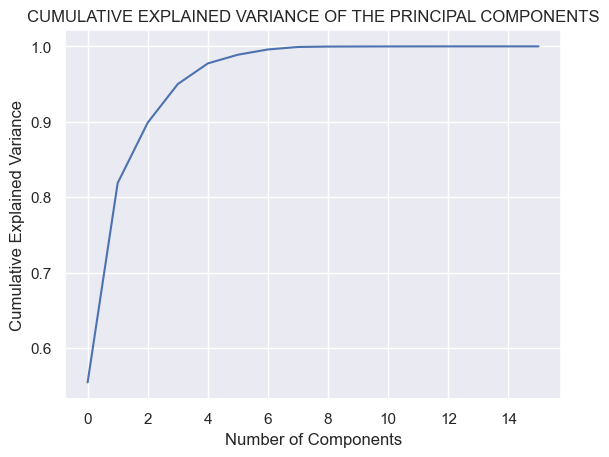

In [170]:
# Visualizing the Principal Components in the feature space
pca = PCA()
pca.fit(norm_X)
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC" + str(i) for i in list(range(1, num_pc + 1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = X.columns.values
loadings_df = loadings_df.set_index('variable')

# Screeplot of Principal Components
cluster.screeplot(obj=[pc_list, pca.explained_variance_ratio_])

# 2D Bi-plot of Principal Components
pca_scores = PCA().fit_transform(norm_X)
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=X.columns.values, var1=round(pca.explained_variance_ratio_[0]*100, 2), var2=round(pca.explained_variance_ratio_[1]*100, 2), colorlist=Y)


# Cumulative Explained Variance Plot
plt.plot(np.cumsum(pca.explained_variance_ratio_)); plt.title('CUMULATIVE EXPLAINED VARIANCE OF THE PRINCIPAL COMPONENTS')
plt.xlabel('Number of Components'); plt.ylabel('Cumulative Explained Variance')
plt.show()

# 3. Model Building

### Defining the functions needed

In [171]:
def training_model_metrics(model, X, Y):
    train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=12, shuffle=True)
    model.fit(train_x, train_y)
    y_pred = model.predict(test_x)
    model_acc = metrics.accuracy_score(test_y, y_pred)
    f1_measure = metrics.f1_score(test_y, y_pred, average='macro')
    model_precision = metrics.precision_score(test_y, y_pred, average='macro')
    model_recall = metrics.recall_score(test_y, y_pred, average='macro')
    print('Accuracy: %.3f, f1 measure: %.3f, precision: %.3f, recall: %.3f' % (model_acc, f1_measure, model_precision, model_recall))
    ConfusionMatrixDisplay.from_estimator(model, test_x, test_y);plt.show()

def optimize_param(model, param, X_optim, Y_optim):
    rf_grid = RandomizedSearchCV(estimator=model, n_iter=30, param_distributions=param, scoring='f1_macro', n_jobs=-1,
                                 cv=5, verbose=2, random_state=12)
    print('Performance Metrics for ML Model of Dataset using optimized hyper-parameters')
    print('-----------------------------------------------------------------------')
    training_model_metrics(rf_grid, X_optim, Y_optim)
    print('The hyper-parameters with the best f1_macro performance:')
    print('----------------------------------------------------------')
    print(rf_grid.best_params_)


def evaluate_PC(model, user_input, user_output):
    train_x, test_x, train_y, test_y = train_test_split(user_input, user_output, test_size=0.2, random_state=12, shuffle=True)
    acc, comp = list(), list()

    for n in range(1, 16):
        pca = PCA(n_components=n)
        pca.fit(train_x)
        pca_transform = pca.fit_transform(train_x)
        cv = KFold(n_splits=5, shuffle=True, random_state=12)
        scores = cross_val_score(model, pca_transform, train_y, scoring='f1_macro', cv=cv, n_jobs=-1)
        acc.append(np.mean(scores))
        comp.append(n)
        print('> No of Components=%d, Accuracy=%.3f' % (n, np.mean(scores)))

    return acc, comp


def display_perf_plot(acc, comp):
    plt.plot(comp, acc)
    plt.title('PRINCIPAL COMPONENT ANALYSIS PERFORMANCE PLOT USING CROSS-VALIDATION')
    plt.axhline(y=max(acc), color='r', linestyle='--')
    plt.xlabel('NUMBER OF COMPONENTS')
    plt.ylabel('F1-MEASURE')
    plt.show()


def KFold_evaluation(model, X, Y):
    means, mins, maxs = list(), list(), list()
    folds = range(2, 13)
    for k in folds:
        cv = KFold(n_splits=k, shuffle=True, random_state=12)
        scores = cross_val_score(model, X, Y, scoring='f1_macro', cv=cv, n_jobs=-1)
        means.append(np.mean(scores))
        mins.append(np.mean(scores) - scores.min())
        maxs.append(scores.max() - np.mean(scores))
    plt.errorbar(folds, means, yerr=[mins, maxs], fmt='o')
    plt.title('CROSS-VALIDATION PERFORMANCE EVALUATION')
    plt.xlabel('NUMBER OF FOLDS')
    plt.ylabel('F1-MEASURE')
    plt.axhline(y=max(means), color='r', linestyle='--')
    plt.show()

## Model type decision

several classification models can be used to classify the beans. Here are some common models:

- Logistic Regression: This is a simple yet effective linear model for binary classification. It can be extended to handle multi-class classification using techniques like one-vs-rest or softmax regression.

- Decision Trees: Decision trees are intuitive and easy to interpret. They can handle both numerical and categorical data and can capture complex relationships between features.

- Random Forest: Random Forest is an ensemble learning method that builds multiple decision trees and combines their predictions. It often performs well and is less prone to overfitting compared to individual decision trees.

- Support Vector Machines (SVM): SVMs are effective for high-dimensional data and can handle both linear and non-linear classification problems through the use of different kernel functions.

- k-Nearest Neighbors (KNN): KNN is a non-parametric, instance-based learning algorithm. It classifies data points based on the majority class among their k nearest neighbors in feature space.

- XGBoost: XGBoost is an efficient and scalable implementation of gradient boosting machines. It builds a series of decision trees sequentially, each one correcting the errors of the previous trees. It's known for its speed, performance, and regularization capabilities.

### XGBoost:

- Performance: XGBoost is known for its high performance and often outperforms other models in various machine learning competitions and real-world applications.
- Regularization: XGBoost provides built-in regularization techniques to prevent overfitting, such as L1 and L2 regularization, which help generalize well to unseen data.
- Handling Non-linear Relationships: XGBoost can capture complex non-linear relationships between features, which might exist in the dataset.
- Feature Importance: XGBoost provides feature importance scores, which can help in understanding which features are most relevant for classification.

### KNN:

- Simplicity: KNN is straightforward and easy to understand. It doesn't require training time, as the model directly uses the training data for prediction.
- Non-parametric: KNN is non-parametric, meaning it makes no assumptions about the underlying distribution of the data.
- Local Structure: KNN can capture local patterns in the data, which may be useful if beans of similar types tend to cluster together in the feature space.
- No Assumptions about Data Distribution: KNN doesn't make any assumptions about the distribution of the data, making it suitable for datasets with complex relationships.

## Model 1: XGBoost Classifier

******************XGBOOST CLASSIFICATION MODEL**************************
Performance metrics for XGBoost Classification of Original Data
-----------------------------------------------------------------------
-----------------------------------------------------------------------
Performance Metrics for ML Model of Dataset using default hyper-parameters
-----------------------------------------------------------------------
Accuracy: 0.934, f1 measure: 0.946, precision: 0.946, recall: 0.946


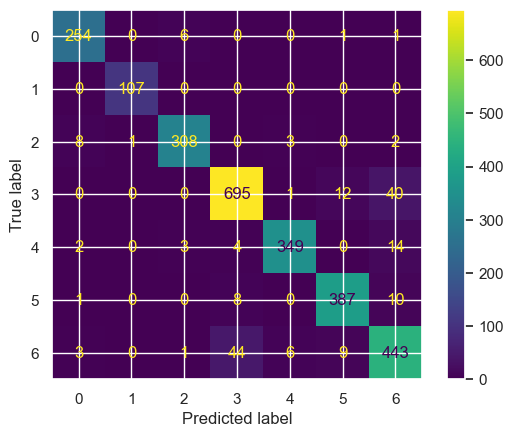

-----------------------------------------------------------------------
Performance Metrics for ML Model of Dataset using optimized hyper-parameters
-----------------------------------------------------------------------
Performance Metrics for ML Model of Dataset using optimized hyper-parameters
-----------------------------------------------------------------------
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Accuracy: 0.936, f1 measure: 0.948, precision: 0.948, recall: 0.949


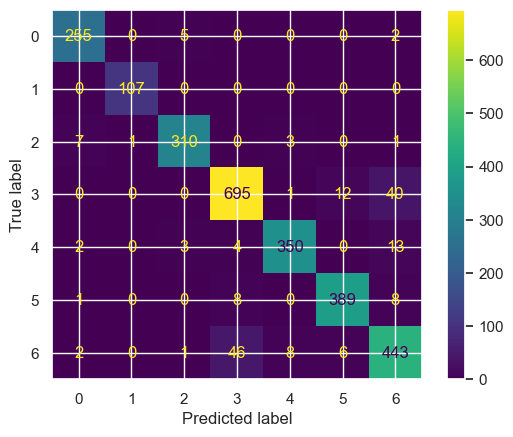

The hyper-parameters with the best f1_macro performance:
----------------------------------------------------------
{'min_child_weight': 3, 'max_depth': 8, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.7}
DIMENSIONALITY REDUCTION USING PRINCIPAL COMPONENT ANALYSIS
-----------------------------------------------------------------------
Performance metrics for XGBoost Classification of Dataset using 8 Principal Components
-----------------------------------------------------------------------
Accuracy: 0.927, f1 measure: 0.941, precision: 0.941, recall: 0.941


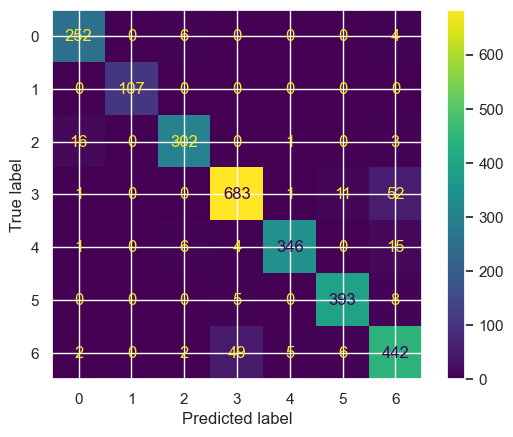

-----------------------------------------------------------------------
Performance metrics for XGBoost Classification of SMOTE Balanced Data
-----------------------------------------------------------------------
-----------------------------------------------------------------------
Performance Metrics for ML Model of Dataset using default hyper-parameters
-----------------------------------------------------------------------
Accuracy: 0.956, f1 measure: 0.957, precision: 0.957, recall: 0.956


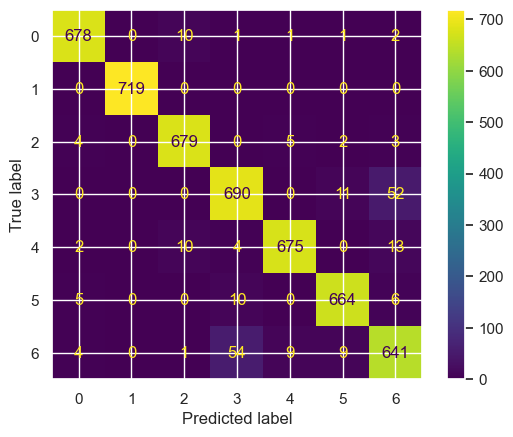

-----------------------------------------------------------------------
Performance Metrics for ML Model of Dataset using optimized hyper-parameters
-----------------------------------------------------------------------
Performance Metrics for ML Model of Dataset using optimized hyper-parameters
-----------------------------------------------------------------------
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Accuracy: 0.955, f1 measure: 0.955, precision: 0.956, recall: 0.955


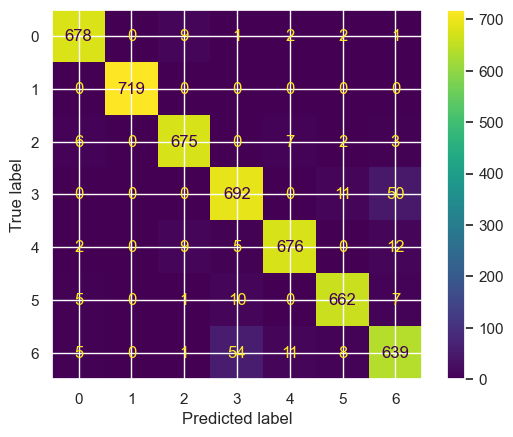

The hyper-parameters with the best f1_macro performance:
----------------------------------------------------------
{'min_child_weight': 3, 'max_depth': 15, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.7}
Performance metrics for XGBoost Classification of SMOTE Dataset using 8 Principal Components
-----------------------------------------------------------------------
Accuracy: 0.957, f1 measure: 0.958, precision: 0.957, recall: 0.958


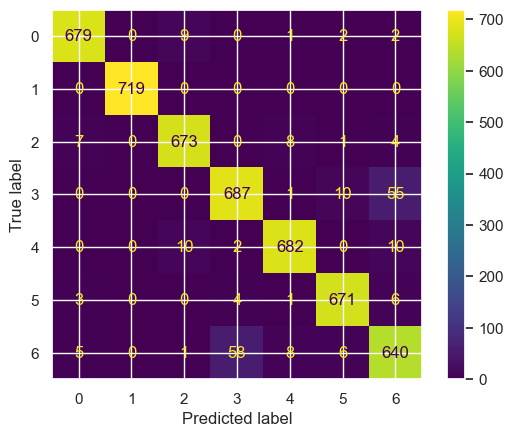

In [172]:
print('******************XGBOOST CLASSIFICATION MODEL**************************')
xgb_model = XGBClassifier(random_state=12)

print('Performance metrics for XGBoost Classification of Original Data')
print('-----------------------------------------------------------------------')
print('-----------------------------------------------------------------------')
print('Performance Metrics for ML Model of Dataset using default hyper-parameters')
print('-----------------------------------------------------------------------')
training_model_metrics(xgb_model, norm_X, label_Y)

# Using GridSearch to optimize the hyper-parameters in XGBoost Classification Model
xgb_param = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
             "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
             "min_child_weight" : [ 1, 3, 5, 7 ],
             "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
             "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }
print('-----------------------------------------------------------------------')
print('Performance Metrics for ML Model of Dataset using optimized hyper-parameters')
print('-----------------------------------------------------------------------')
optimize_param(xgb_model, xgb_param, norm_X, label_Y)

# PCA Dimensionality Reduction to 8 PCs
print('DIMENSIONALITY REDUCTION USING PRINCIPAL COMPONENT ANALYSIS')
print('-----------------------------------------------------------------------')
print('Performance metrics for XGBoost Classification of Dataset using 8 Principal Components')
print('-----------------------------------------------------------------------')
pca_xgb = PCA(n_components=8).fit_transform(norm_X)
training_model_metrics(xgb_model, pca_xgb, label_Y)

# Applying SMOTE technique on the dataset
print('-----------------------------------------------------------------------')
print('Performance metrics for XGBoost Classification of SMOTE Balanced Data')
print('-----------------------------------------------------------------------')
sm = SMOTE(random_state=12)
X_sm_xgb, Y_sm_xgb = sm.fit_resample(norm_X, label_Y)
print('-----------------------------------------------------------------------')
print('Performance Metrics for ML Model of Dataset using default hyper-parameters')
print('-----------------------------------------------------------------------')
training_model_metrics(xgb_model, X_sm_xgb, Y_sm_xgb)

# Optimize hyper-parameters and display performance metrics for XGBoost model trained using SMOTE data
print('-----------------------------------------------------------------------')
print('Performance Metrics for ML Model of Dataset using optimized hyper-parameters')
print('-----------------------------------------------------------------------')
optimize_param(xgb_model, xgb_param, X_sm_xgb, Y_sm_xgb)

# PCA Dimensionality Reduction to 8 PCs
print('Performance metrics for XGBoost Classification of SMOTE Dataset using 8 Principal Components')
print('-----------------------------------------------------------------------')
pca_sm_xgb = PCA(n_components=8).fit_transform(X_sm_xgb)
training_model_metrics(xgb_model, pca_sm_xgb, Y_sm_xgb)

## Model 2: K Nearest Neighbours

******************K-NEAREST NEIGHBORS CLASSIFICATION MODEL**************************
Performance metrics for K-Nearest Neighbors Classification of Original Data
-----------------------------------------------------------------------
-----------------------------------------------------------------------
Performance Metrics for ML Model of Dataset using default hyper-parameters
-----------------------------------------------------------------------
Accuracy: 0.924, f1 measure: 0.936, precision: 0.937, recall: 0.936


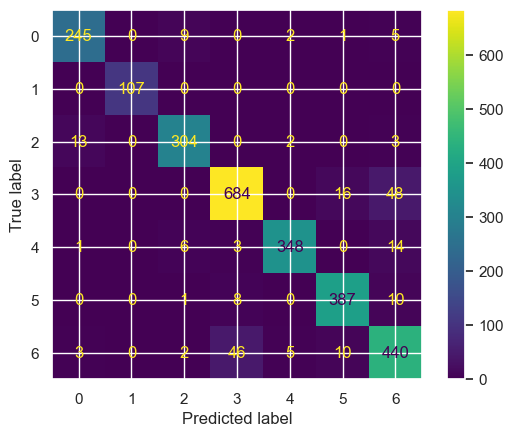

-----------------------------------------------------------------------
Performance Metrics for ML Model of Dataset using optimized hyper-parameters
-----------------------------------------------------------------------
Performance Metrics for ML Model of Dataset using optimized hyper-parameters
-----------------------------------------------------------------------
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Accuracy: 0.928, f1 measure: 0.941, precision: 0.942, recall: 0.940


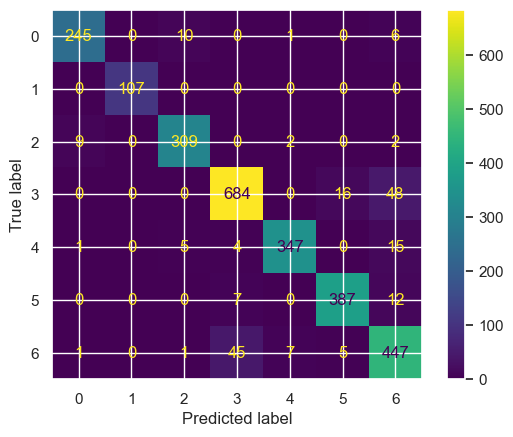

The hyper-parameters with the best f1_macro performance:
----------------------------------------------------------
{'n_neighbors': 11, 'leaf_size': 39}
DIMENSIONALITY REDUCTION USING PRINCIPAL COMPONENT ANALYSIS
-----------------------------------------------------------------------
Performance metrics for K-Nearest Neighbors Classification of Dataset using 8 Principal Components
-----------------------------------------------------------------------
Accuracy: 0.924, f1 measure: 0.937, precision: 0.937, recall: 0.936


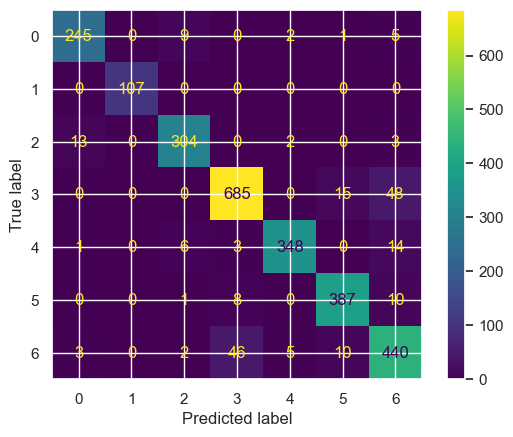

-----------------------------------------------------------------------
Performance metrics for K-Nearest Neighbors Classification of SMOTE Balanced Data
-----------------------------------------------------------------------
-----------------------------------------------------------------------
Performance Metrics for ML Model of Dataset using default hyper-parameters
-----------------------------------------------------------------------
Accuracy: 0.945, f1 measure: 0.946, precision: 0.946, recall: 0.946


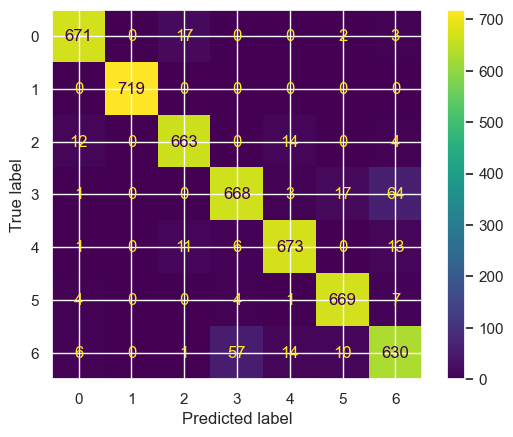

-----------------------------------------------------------------------
Performance Metrics for ML Model of Dataset using optimized hyper-parameters
-----------------------------------------------------------------------
Performance Metrics for ML Model of Dataset using optimized hyper-parameters
-----------------------------------------------------------------------
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Accuracy: 0.959, f1 measure: 0.960, precision: 0.960, recall: 0.960


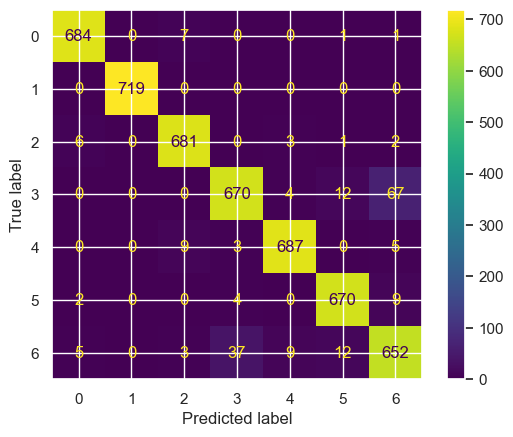

The hyper-parameters with the best f1_macro performance:
----------------------------------------------------------
{'n_neighbors': 1, 'leaf_size': 37}
Performance metrics for K-Nearest Neighbors Classification of SMOTE Dataset using 8 Principal Components
-----------------------------------------------------------------------
Accuracy: 0.945, f1 measure: 0.946, precision: 0.946, recall: 0.946


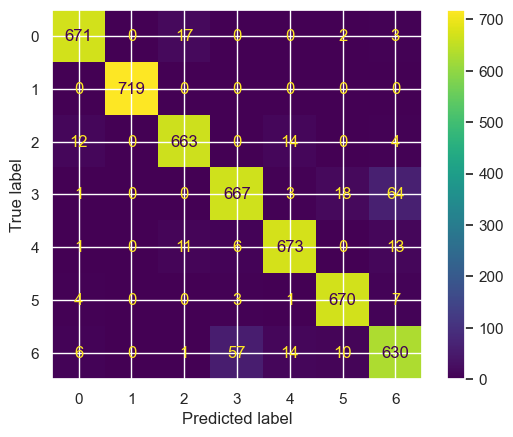

In [173]:
####################################################
############ K-Nearest Neighbors###################
####################################################
print('******************K-NEAREST NEIGHBORS CLASSIFICATION MODEL**************************')
knn_model = KNeighborsClassifier()
print('Performance metrics for K-Nearest Neighbors Classification of Original Data')
print('-----------------------------------------------------------------------')
print('-----------------------------------------------------------------------')
print('Performance Metrics for ML Model of Dataset using default hyper-parameters')
print('-----------------------------------------------------------------------')
training_model_metrics(knn_model, norm_X, label_Y)

# Using GridSearch to optimize the hyper-parameters in K-Nearest Neighbors Classification Model
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))

knn_param = {'leaf_size': leaf_size,
             'n_neighbors': n_neighbors}
print('-----------------------------------------------------------------------')
print('Performance Metrics for ML Model of Dataset using optimized hyper-parameters')
print('-----------------------------------------------------------------------')
optimize_param(knn_model, knn_param, norm_X, label_Y)

# PCA Dimensionality Reduction to 8 PCs
print('DIMENSIONALITY REDUCTION USING PRINCIPAL COMPONENT ANALYSIS')
print('-----------------------------------------------------------------------')
print('Performance metrics for K-Nearest Neighbors Classification of Dataset using 8 Principal Components')
print('-----------------------------------------------------------------------')
pca_knn = PCA(n_components=8).fit_transform(norm_X)
training_model_metrics(knn_model, pca_knn, label_Y)

# Applying SMOTE technique on the dataset
print('-----------------------------------------------------------------------')
print('Performance metrics for K-Nearest Neighbors Classification of SMOTE Balanced Data')
print('-----------------------------------------------------------------------')
sm = SMOTE(random_state=12)
X_sm_knn, Y_sm_knn = sm.fit_resample(norm_X, label_Y)
print('-----------------------------------------------------------------------')
print('Performance Metrics for ML Model of Dataset using default hyper-parameters')
print('-----------------------------------------------------------------------')
training_model_metrics(knn_model, X_sm_knn, Y_sm_knn)

# Optimize hyper-parameters and display performance metrics for K-Nearest Neighbors model trained using SMOTE data
print('-----------------------------------------------------------------------')
print('Performance Metrics for ML Model of Dataset using optimized hyper-parameters')
print('-----------------------------------------------------------------------')
optimize_param(knn_model, knn_param, X_sm_knn, Y_sm_knn)

# PCA Dimensionality Reduction to 8 PCs
print('Performance metrics for K-Nearest Neighbors Classification of SMOTE Dataset using 8 Principal Components')
print('-----------------------------------------------------------------------')
pca_sm_knn = PCA(n_components=8).fit_transform(X_sm_knn)
training_model_metrics(knn_model, pca_sm_knn, Y_sm_knn)

## 4. Why Regularization?
- It can be seen that without regularization the XGBoost classifer is completely overfitting with accuracy of 1, Hence by introducing K-Fold validation with K=5 we're introducing the regularization and preventing the overfitting of the model.

# 5. Model Deployment
### 1. Studying and Comparing Methods/Tools for Deploying ML Models:
#### Here's a breakdown of 5 popular methods/tools for ML model deployment, along with their key characteristics and considerations: ####


| **Method/Tool**                                                                                   | **Description**                                                                                           | **Pros**                                                                                                                  | **Cons**                                                                                                                     | **Ideal for**                                                                                |
| ------------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------- | ---------------------------------------------------------------------------------------------------------------------------- | -------------------------------------------------------------------------------------------- |
| **Cloud-Based MLOps Platforms** (e.g., AWS SageMaker, Azure Machine Learning, Google AI Platform) | Integrated environments offering tools for training, deployment, management, and monitoring of models.    | \- Scalability, pre-built infrastructure, ease of use, rich tooling. - Continuous delivery, monitoring, and optimization. | \- Vendor lock-in, potential costs depending on usage.                                                                       | Large-scale deployments with complex workflows, teams needing a comprehensive solution.      |
| **RESTful APIs** (using Flask, Django, FastAPI)                                                   | Create web APIs that accept data, process it through the model, and return predictions via HTTP requests. | \- Flexibility, customization, control over infrastructure. - Integrates well with existing web applications.             | \- Requires development and maintenance effort. - May need additional scaling and security considerations.                   | Simple to medium-scale deployments, projects requiring integration with web applications.    |
| **Serverless Functions** (e.g., AWS Lambda, Azure Functions, Google Cloud Functions)              | Event-driven, pay-per-use model where code execution is triggered on events (e.g., HTTP requests).        | \- Cost-effective for low-traffic applications. - Scalability, minimal server management.                                 | \- Cold start latency (initial execution time). - May not be suitable for complex models or high-throughput requirements.    | Lightweight deployments, real-time predictions with moderate traffic.                        |
| **Containerization** (using Docker)                                                               | Packages models and dependencies into containers for consistent execution across environments.            | \- Portability, reproducibility, isolation. - Easier management and deployment across different platforms.                | \- Can add complexity for large deployments. - May require container orchestration tools (e.g., Kubernetes) for scalability. | Multi-environment deployments, ensuring model consistency across platforms.                  |
| **Model Serialization Libraries** (e.g., ONNX, PMML)                                              | Standardize model formats for portability across different frameworks and runtime environments.           | \- Interoperability, cross-platform execution. - Simplifies integration with various deployment targets.                  | \- May require conversion tools for specific models/frameworks. - Limited feature support for some libraries.                | Sharing models between different platforms, embedding models in mobile apps or edge devices. |



### 2. Persisting and Deploying Your Model:

**Choosing a Method:**  
- Consider factors like model complexity, traffic volume, scalability needs, and team expertise. 
- For this walkthrough, we'll focus on deploying a simple model using a RESTful API with Flask, making it accessible via HTTP requests.

**Step-1: Save Your Model:**  
- Use a serialization library like joblib or pickle to save your trained model to a file.
<code>
    import joblib
    joblib.dump(model, 'model.sav')</code>

**Step-2: Create a Flask Application:**  
- Set up a Flask app to handle incoming requests and respond with predictions. Example Code:
<code>
    from flask import Flask, request, jsonify
    import pandas as pdfrom .data_preprocessing 
    import preprocess_data  
    # Import preprocessing function (if needed)
    # Load the saved modelmodel = joblib.load('model.sav')
</code>

<code>
    app = Flask(__name__)
    @app.route('/predict', methods=['POST'])
    def predict():data = request.get_json()    
    # Preprocess data if necessary (call your preprocessing function here)    
    prediction = model.predict(data)  
    # Assuming data is already preprocessedreturn jsonify({'prediction': prediction.tolist()})
    if __name__ == '__main__':
    app.run(debug=True)
</code>

- Preprocess Data (Optional) : If your model requires preprocessing, create a separate function to handle it before making predictions.

- Run the Flask Application : Run `python app.py` to start the prediction server.

- Test the Deployment : Use tools like Postman or curl to send POST requests to the `/predict` endpoint with JSON data representing new feature values. The server should respond with the model's prediction(s).

**Example Request (using Postman):**  
- Set the HTTP method to POST.
- Set the Content-Type header to

In [174]:
import joblib
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold, cross_val_score
import matplotlib.pyplot as plt
import numpy as np

def training_model_metrics(model, X, Y):
    train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=12, shuffle=True)
    model.fit(train_x, train_y)
    y_pred = model.predict(test_x)
    model_acc = metrics.accuracy_score(test_y, y_pred)
    f1_measure = metrics.f1_score(test_y, y_pred, average='macro')
    model_precision = metrics.precision_score(test_y, y_pred, average='macro')
    model_recall = metrics.recall_score(test_y, y_pred, average='macro')
    print('Accuracy: %.3f, f1 measure: %.3f, precision: %.3f, recall: %.3f' % (model_acc, f1_measure, model_precision, model_recall))
    ConfusionMatrixDisplay.from_estimator(model, test_x, test_y);plt.show()
    return model

def optimize_param(model, param, X_optim, Y_optim):
    rf_grid = RandomizedSearchCV(estimator=model, n_iter=30, param_distributions=param, scoring='f1_macro', n_jobs=-1,
                                 cv=5, verbose=2, random_state=12)
    print('Performance Metrics for ML Model of Dataset using optimized hyper-parameters')
    print('-----------------------------------------------------------------------')
    trained_model = training_model_metrics(rf_grid, X_optim, Y_optim)
    print('The hyper-parameters with the best f1_macro performance:')
    print('----------------------------------------------------------')
    print(rf_grid.best_params_)
    return trained_model

def evaluate_PC(model, user_input, user_output):
    train_x, test_x, train_y, test_y = train_test_split(user_input, user_output, test_size=0.2, random_state=12, shuffle=True)
    acc, comp = list(), list()

    for n in range(1, 16):
        pca = PCA(n_components=n)
        pca.fit(train_x)
        pca_transform = pca.fit_transform(train_x)
        cv = KFold(n_splits=5, shuffle=True, random_state=12)
        scores = cross_val_score(model, pca_transform, train_y, scoring='f1_macro', cv=cv, n_jobs=-1)
        acc.append(np.mean(scores))
        comp.append(n)
        print('> No of Components=%d, Accuracy=%.3f' % (n, np.mean(scores)))

    return acc, comp

def display_perf_plot(acc, comp):
    plt.plot(comp, acc)
    plt.title('PRINCIPAL COMPONENT ANALYSIS PERFORMANCE PLOT USING CROSS-VALIDATION')
    plt.axhline(y=max(acc), color='r', linestyle='--')
    plt.xlabel('NUMBER OF COMPONENTS')
    plt.ylabel('F1-MEASURE')
    plt.show()

def KFold_evaluation(model, X, Y):
    means, mins, maxs = list(), list(), list()
    folds = range(2, 13)
    for k in folds:
        cv = KFold(n_splits=k, shuffle=True, random_state=12)
        scores = cross_val_score(model, X, Y, scoring='f1_macro', cv=cv, n_jobs=-1)
        means.append(np.mean(scores))
        mins.append(np.mean(scores) - scores.min())
        maxs.append(scores.max() - np.mean(scores))
    plt.errorbar(folds, means, yerr=[mins, maxs], fmt='o')
    plt.title('CROSS-VALIDATION PERFORMANCE EVALUATION')
    plt.xlabel('NUMBER OF FOLDS')
    plt.ylabel('F1-MEASURE')
    plt.axhline(y=max(means), color='r', linestyle='--')
    plt.show()

## KNN Confusion matrix and saving the final model

Performance Metrics for ML Model of Dataset using optimized hyper-parameters
-----------------------------------------------------------------------
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Accuracy: 0.959, f1 measure: 0.960, precision: 0.960, recall: 0.960


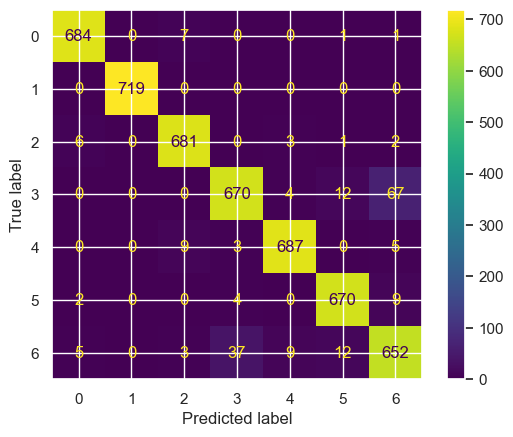

The hyper-parameters with the best f1_macro performance:
----------------------------------------------------------
{'n_neighbors': 1, 'leaf_size': 37}


['./model/knn_model.pkl']

In [175]:
# Example usage:
trained_model=optimize_param(knn_model, knn_param, X_sm_knn, Y_sm_knn)
#trained_model = optimize_param(nn_model, param_grid, X_train, Y_train)
joblib.dump(trained_model, './model/knn_model.pkl')  # Save the final trained model

## XGBoost Confusion matrix and saving final model

Performance Metrics for ML Model of Dataset using optimized hyper-parameters
-----------------------------------------------------------------------
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Accuracy: 0.955, f1 measure: 0.955, precision: 0.956, recall: 0.955


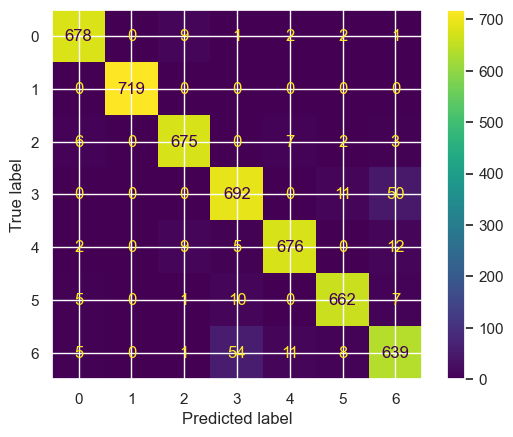

The hyper-parameters with the best f1_macro performance:
----------------------------------------------------------
{'min_child_weight': 3, 'max_depth': 15, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.7}


['./model/xgboost_model.pkl']

In [176]:
# Example usage:
trained_model2=optimize_param(xgb_model, xgb_param, X_sm_xgb, Y_sm_xgb)
#trained_model = optimize_param(nn_model, param_grid, X_train, Y_train)
joblib.dump(trained_model, './model/xgboost_model.pkl')  # Save the final trained model